# Ejercicios 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#función que calcula la transformada de Fourier
def Fourier(fdata, N, inv): 
    X=[0]*(N)              
    if(inv):
        omega = 2.0*np.pi/N
    else:
        omega = -2.0*np.pi/N
    for k in range(0,N):
        A,B=0.0, 0.0        
        for n in range(0,N):
            A+=fdata[n].real*np.cos(omega*n*k)+fdata[n].imag*np.sin(omega*n*k)
            B+=fdata[n].real*np.sin(omega*n*k)+fdata[n].imag*np.cos(omega*n*k)
        X[k]=complex(A,B)
    if(inv):
        for k in range(0,N):
            X[k]/=N
            
    return X 

In [3]:
def PowerSpec(N,L,datos, num_bins): #función que calcula el espectro de potencias en una dirección de 45 grados
    rango=2*np.pi/L

    k=np.zeros(shape=(num_bins,2), dtype=float)
    for i in range(num_bins):
        k[i]=[i*rango,i*rango]
    k_mag=np.sqrt(np.multiply(k,k))

    d=2
    A,B=0.0, 0.0        
    X2=np.zeros(shape=(num_bins), dtype=float)
    for j in range(num_bins):
        for i in range(N):
                    A+=np.cos(np.dot(k[j],datos[i]))
                    B+=-np.sin(np.dot(k[j],datos[i]))
        X2[j]=(A/N)**2 +(B/N)**2
    P=L**d *X2 -L**d /N
    return P, k_mag


## Cálculo de espectro de potencias y su transformada de Fourier de diferentes distribuciones de puntos

### Distribución de malla 

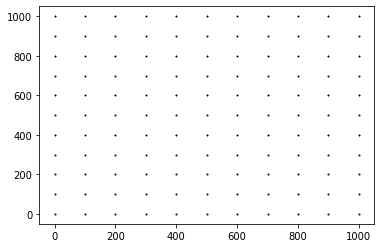

In [4]:

L=1000
d=100
x=[]
y=[]
for i in range (int(L/d+1)):
    for j in range(int(L/d+1)):
        x=np.append(x,[(i)*d])
        y=np.append(y,[(j)*d])

datos_malla=np.zeros(shape=(len(x),2), dtype=float)
datos_malla[:,0]=x
datos_malla[:,1]=y


plt.scatter(datos_malla[:,0],datos_malla[:,1], s=1, color='0')
plt.show()

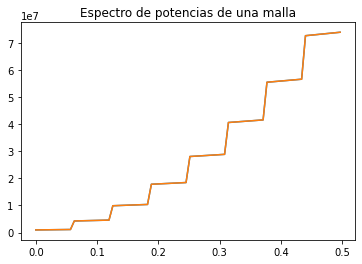

In [5]:
num_bins=80
L=1000

power, K=PowerSpec(len(datos_malla[:,0]),1000,datos_malla,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K,power)
plt.title('Espectro de potencias de una malla')
plt.show()



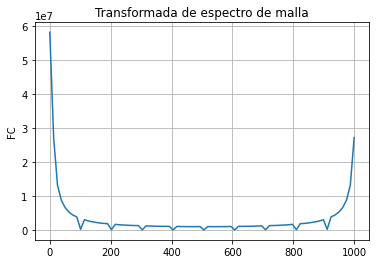

In [6]:
N=len(power)
xff = np.linspace(0,L,num_bins)


Y5=Fourier(power, N,inv=False)
plt.plot(xff,2.0/N * np.abs(Y5))
plt.grid()
plt.title('Transformada de espectro de malla')
plt.ylabel('FC')
plt.show()

### Distribución de disco

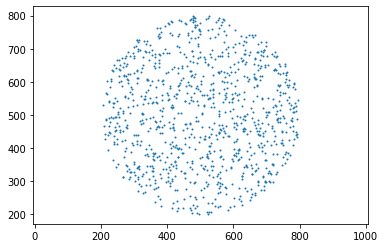

In [14]:
R=300
N=1000
phi = np.random.uniform(0,2*np.pi,N)
costheta =np.random.uniform(-1,1,N)
u = np.random.uniform(0,R**2,N)

theta = np.arccos( costheta )
r =  u**(1/2)

datos_disco=np.zeros(shape=(N,2), dtype=float)
datos_disco[:,0] = r * np.cos( phi) +500
datos_disco[:,1] = r * np.sin( phi) +500




plt.scatter(datos_disco[:,0],datos_disco[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()

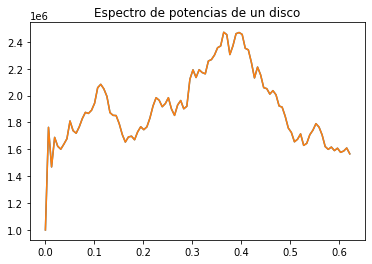

In [15]:
num_bins=100
L=700

power, K=PowerSpec(len(datos_disco[:,0]),1000,datos_disco, num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K,power)
plt.title('Espectro de potencias de un disco')
plt.show()


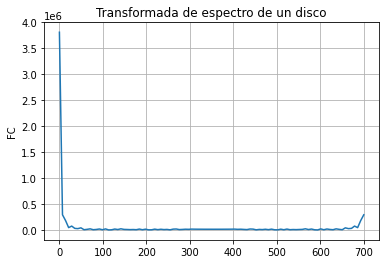

In [16]:
N=len(power)
xff = np.linspace(0,L,num_bins)


Y5=Fourier(power, N,inv=False)
plt.plot(xff,2.0/N * np.abs(Y5))
plt.grid()
plt.title('Transformada de espectro de un disco')
plt.ylabel('FC')
plt.show()

### Distribución de anillo

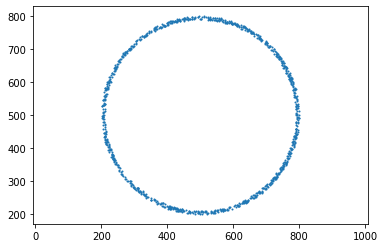

In [17]:

def Anillo(R0,Rf,N,L):
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2)

    datos_anillo=np.zeros(shape=(N,2), dtype=float)
    datos_anillo[:,0] = r * np.cos( phi)+L/2
    datos_anillo[:,1] = r * np.sin( phi)+L/2
    return datos_anillo
R0=290
Rf=300
N=1000
L=1000

datos_anillo=Anillo(R0,Rf,N,L)

plt.scatter(datos_anillo[:,0],datos_anillo[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()

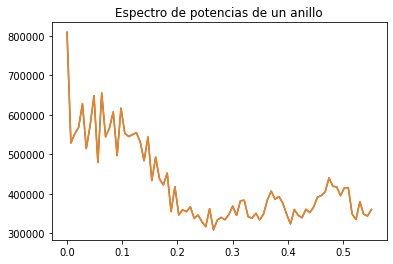

In [18]:
num_bins=80
L=900

power, K=PowerSpec(len(datos_anillo[:,0]),L,datos_anillo,num_bins)

langs = np.arange(0,L,L/num_bins)
plt.plot(K,power)
plt.title('Espectro de potencias de un anillo')
plt.show()

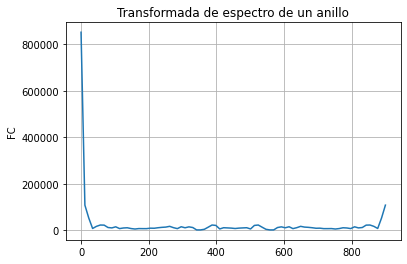

In [19]:
N=len(power)
xff = np.linspace(0,L,num_bins)

Y5=Fourier(power, N,inv=False)
plt.plot(xff,2.0/N * np.abs(Y5))
plt.grid()
plt.title('Transformada de espectro de un anillo')
plt.ylabel('FC')
plt.show()

### Distribución de multiples anillos

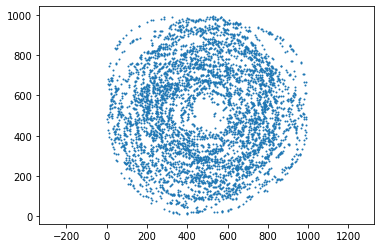

In [20]:
N=100 #numero puntos por anillo
NA=50 #numero de anillos
R0=290 #radio interior
Rf=300 #radio exterior

datos_anillos=np.zeros(shape=(N*NA,2), dtype=float)
x=[]
y=[]
for i in range(NA):
    x0=np.random.uniform(300,700)
    y0=np.random.uniform(300,700)
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2) 
    x=np.append(x,[r * np.cos( phi) +x0])
    y=np.append(y,[r * np.sin( phi) +y0])

     
plt.scatter(x,y, s=1)

datos_anillos[:,0]=x
datos_anillos[:,1]=y

plt.figsize=(40,40)
plt.axis('equal')
plt.show()

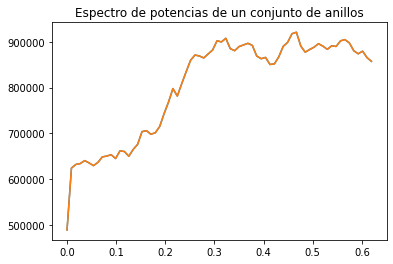

In [21]:
num_bins=70
L=700
power, K=PowerSpec(len(datos_anillos[:,0]),L,datos_anillos, num_bins)

plt.plot(K,power)
plt.title('Espectro de potencias de un conjunto de anillos')
plt.show()

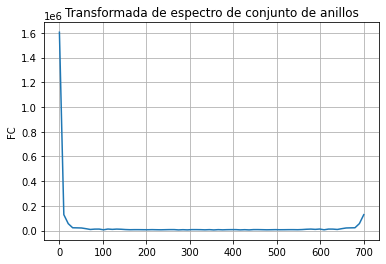

In [23]:
N = len(power)
xff = np.linspace(0,L,num_bins)

Y5=Fourier(power, N,inv=False)
plt.plot(xff,2.0/N * np.abs(Y5))
plt.grid()
plt.title('Transformada de espectro de conjunto de anillos')
plt.ylabel('FC')
plt.show()
